In [ ]:
# Link para o dataset utilizado: https://www.kaggle.com/datasets/yasserh/titanic-dataset

In [ ]:
# Importando as Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Carregando o dataset

df = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_corr = df.drop(columns = ['Name', 'Embarked', 'Sex', 'Ticket', 'Cabin', 'PassengerId'])

In [ ]:
corr = df_corr.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
# Pré-processando os dados e Selecionando as Features

# Selecionando as features desejadas
selected_features = ['Age', 'Fare']

# Dropando as linhas com valores faltando
df_selected = df[selected_features].dropna()

# Mostrando as primeiras linhas do novo DataFrame
df_selected.head()


,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [ ]:
# Escalonando os dados

# Escalonando as Features selecionadas com base na média e desvio padrão
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Criando um DataFrame os dados escalonados em um DataFrame novamente
df_scaled = pd.DataFrame(df_scaled, columns=df_selected.columns)

# Mostrando as primeiras linhas do novo DataFrame escalonado
df_scaled.head()

,Age,Fare
0,-0.530377,-0.518978
1,0.571831,0.691897
2,-0.254825,-0.506214
3,0.365167,0.348049
4,0.365167,-0.503850


In [ ]:
#  Aplicando o Método K-Means

# Definir o número de Clusters
n_clusters = 4

# Inicializando um objeto K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Dando fit no modelo
kmeans.fit(df_scaled)

# Pegando as labels dos clusters
cluster_labels = kmeans.labels_

# Adicionando as labels nos dados originais
df_selected['Cluster'] = cluster_labels

# Mostrando as primeiras linhas do novo DataFrame com as labels dos clusters
df_selected.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Fare,Cluster
0,22.0,7.2500,1
1,38.0,71.2833,0
2,26.0,7.9250,3
3,35.0,53.1000,3
4,35.0,8.0500,3


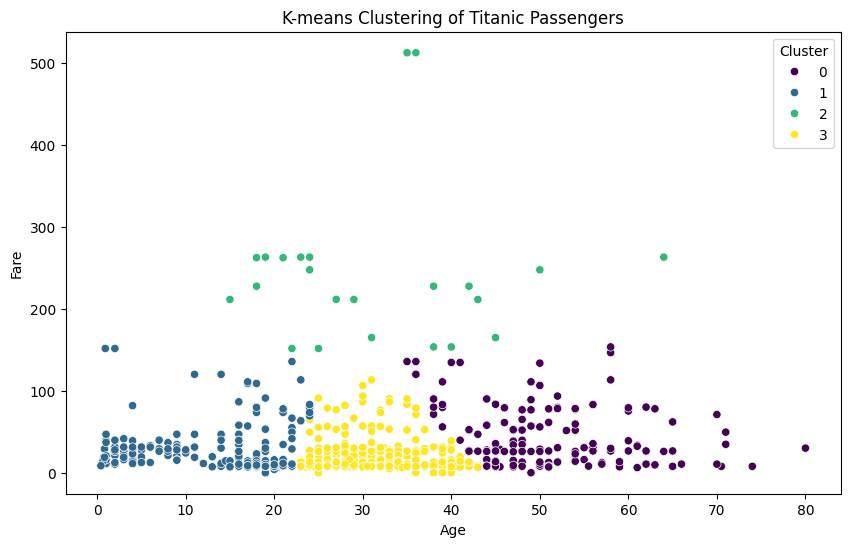

In [ ]:
# Scatter plot da 'Age' vs 'Fare', colorido por clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Cluster', data=df_selected, palette='viridis')
plt.title('K-means Clustering of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [ ]:
# Soma dos quadrados das distâncias
kmeans.inertia_

431.3564110898219